# EFlux2 on Isoprenol proteomics

In [1]:
%pip install cobra

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cobra
import pandas as pd
import numpy as np

import sys

source_dir = './src_isoprenol'
sys.path.append(source_dir)

from utils import *
from cobra_functions import get_EFlux2_solution
from plot import *

import importlib
import p_to_f_functions


In [3]:
model = cobra.io.load_json_model('./data/iJN1463_IPP_bypass.json')
model.solver = 'glpk'

In [4]:
prot_df = pd.read_csv('./data/normalized_proteomics_pivot_c0-c6.csv', index_col=0)
prot_df

,MM_1762,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5414,PP_5415,PP_5416,PP_5417,PP_5418,SPy_1046,YNR043W,b4055 JW4015,neo,isoprenol
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.957637,0.951346,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,1.027012,0.988927,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,1.055696,1.031219,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.139495,1.072695,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,1.055021,0.991063,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.714721,0.742051,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.715938,0.756146,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.766955,0.645999,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521


In [5]:
gene_id_list = [g.id for g in model.genes]
pp_genes = [g for g in model.genes if g.id[0:3] == 'PP_']
print(f'There are N = {len(pp_genes)} PP_XXXX genes in the model')
pp_genes[10]

There are N = 1445 PP_XXXX genes in the model


Gene identifier,PP_0878
Name,dppF
Memory address,0xffff7be6c0d0
Functional,True
In 23 reaction(s),"GLYMETabcpp, GLYGLYabcpp, PROGLYabcpp, GLYGLUabcpp, ALAALAabcpp, ALATRPabcpp, BALAALAabcpp, BALABALAabcpp, BLAMDabcpp, GLYSERabcpp, HISGLYabcpp, LEULEUabcpp, ALAHISabcpp, ALALEUabcpp, BALALEUabcpp,..."


In [6]:
non_pp_genes = [g for g in model.genes if g.id[0:3] != 'PP_']
non_pp_gene_ids = [g.id for g in model.genes if g.id[0:3] != 'PP_']

print(f'There are N = {len(non_pp_genes)} non-PP_XXXX genes in the model')
print(non_pp_gene_ids)

There are N = 5 non-PP_XXXX genes in the model
['HMGS', 'HMGR', 'MK', 'PMD', 'AphA']


The following heterologous genes are in the GSM:
- HMGS: HMG-CoA synthase = MvaS
- HMGR: HMG-CoA reductase = MvaE/EF_1364
- MK: Mevalonate Kinase = MM_1762
- PMD: Phosphomevalonate decarboxylase = YNR043W
- AphA: IP phosphatase = b4055 JW4015

The following non-putida proteins are in the proteomics data:
- MM_1762: Mevalonate kinase | MK
- SPy_1046: dCas9
- YNR043W: MVD1/Mevalonate Pyrophosphate Decarboxylase | PMD 
- aacc1: gent resistance 
- b4055 JW4015: aphA in E. coli | AphA
- mvas: HMG-CoA synthase | HMGS
- neo: kanamycin resistance
- mvae: HMG-CoA reductase | HMGR | EF_1364

Need to replace the column name for each non-PP protein measurement with its name in the GSM dataframe. 

In [7]:
non_pp_prot = [p for p in prot_df.columns if p.lower()[:3] != 'pp_']
non_pp_prot

['MM_1762', 'SPy_1046', 'YNR043W', 'b4055 JW4015', 'neo', 'isoprenol']

In [8]:
columns_to_update = {
    'mvas':'HMGS',
    'EF_1364':'HMGR',
    'MM_1762': 'MK',
    'YNR043W': 'PMD',
    'b4055 JW4015': 'AphA'
}
# prot_df = pd.read_csv('./data/top3_norm.csv', index_col=0)
# assert all([proteomics_name in prot_df.columns for proteomics_name in list(columns_to_update.keys())]), 'One or more proteomics_name in columns_to_update is not in prot_df'
# assert all([gsm_id in gene_id_list for gsm_id in list(columns_to_update.values())]), 'One or more gsm_ids in columns_to_update not in GSM'
prot_df[
    [pn for pn in list(columns_to_update.keys()) if pn not in prot_df.columns]
] = 10

prot_df = prot_df.rename(columns = columns_to_update)

## Check how many GSM genes are measured

In [9]:
gene_in_model_not_measured = [g for g in gene_id_list if g not in list(prot_df.columns)]
print(f'There are N = {len(gene_in_model_not_measured)} genes in the model that are not measured')

There are N = 760 genes in the model that are not measured


In [10]:
gene_measured_not_in_model = [g for g in list(prot_df.columns) if g not in gene_id_list]
print(f'There are N = {len(gene_measured_not_in_model)} genes in the proteomics data that are not in the model')

There are N = 958 genes in the proteomics data that are not in the model


## Run EFlux2 on different strains

In [11]:
prot_df

,MK,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,SPy_1046,PMD,AphA,neo,isoprenol,HMGS,HMGR
line_name_rep_cycle,,,,,,,,,,,,,,,,,,,,,
Control-R10_c0,0.951793,1.094915,0.970530,1.133319,0.957359,0.787047,0.934429,1.095724,1.152434,0.898198,...,0.792854,0.952586,0.000000,1.275427,0.988950,1.075991,1.110129,1.024392,10,10
Control-R11_c0,1.047312,0.771961,0.854275,1.007493,0.911182,0.794843,1.079606,1.054531,1.054544,1.061720,...,0.872016,1.053211,0.022315,1.095618,1.066124,1.224033,1.058979,1.120367,10,10
Control-R12_c0,1.054954,1.242484,0.500928,1.154855,0.969491,1.662368,0.994657,0.958415,0.958498,1.031600,...,0.890724,0.955814,6.881715,1.179865,1.025106,0.905480,1.131022,1.178920,10,10
Control-R13_c0,0.933705,1.051552,1.586093,0.932927,0.992892,0.994851,1.013185,1.252256,1.137690,1.056214,...,1.008304,1.037332,0.021247,0.819190,1.014700,0.904057,0.896219,0.720284,10,10
Control-R14_c0,0.920443,1.294411,1.084229,1.028170,0.825054,0.875014,1.036462,1.172617,0.838294,1.033187,...,0.991993,0.899485,0.045492,0.901863,1.047413,0.997991,1.083941,1.030501,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5419-R2_c0,0.831806,1.079450,0.040345,0.591196,0.433515,1.591181,0.635789,0.521773,0.651952,0.840361,...,0.630470,0.871891,0.028549,0.036465,0.972795,1.222933,1.008801,2.153361,10,10
PP_5419-R3_c0,0.854970,1.111790,0.310904,0.663168,0.667366,2.381747,0.622027,0.634366,1.168989,0.809204,...,0.596430,0.767842,0.029056,0.037112,0.938466,1.087679,1.079077,2.397354,10,10
PP_5420-R1_c0,1.004817,1.104894,0.442635,0.748915,0.337878,1.798357,0.237874,0.392700,0.869069,0.328949,...,0.726382,0.892056,0.084788,0.030160,0.705855,0.730318,1.447907,0.484521,10,10


In [12]:
# LINE_CYCLE = 'Control_P1_c3'
# proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[LINE_CYCLE, :].transpose())


In [13]:
# import kindl.plot_multioutput as plot_multioutput


In [14]:
importlib.reload(p_to_f_functions)
# p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)

<module 'p_to_f_functions' from '/code/Isoprenol_CRISPRi/DavidCarruthers/ml/cobrapy/./src_isoprenol/p_to_f_functions.py'>

In [15]:
worst_titer_strain = prot_df.loc[prot_df['isoprenol']>0.1, 'isoprenol'].sort_values(ascending = True).head(10).index[9]
best_titer_strain = prot_df['isoprenol'].sort_values(ascending = False).head(1).index[0]
control_strain = 'Control-R1_c0'

In [16]:
prot_df.index

Index(['Control-R10_c0', 'Control-R11_c0', 'Control-R12_c0', 'Control-R13_c0',
       'Control-R14_c0', 'Control-R15_c0', 'Control-R16_c0', 'Control-R17_c0',
       'Control-R18_c0', 'Control-R1_c0',
       ...
       'PP_5416-R3_c0', 'PP_5417-R1_c0', 'PP_5417-R2_c0', 'PP_5417-R3_c0',
       'PP_5419-R1_c0', 'PP_5419-R2_c0', 'PP_5419-R3_c0', 'PP_5420-R1_c0',
       'PP_5420-R2_c0', 'PP_5420-R3_c0'],
      dtype='object', name='line_name_rep_cycle', length=1512)

In [17]:
for strain in [worst_titer_strain, control_strain, best_titer_strain]:
    print(f"strain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")

strain: PP_4012-R3_c0	titer: 0.2509055056394759
strain: Control-R1_c0	titer: 1.078339570460595
strain: PP_0751_PP_0813_PP_0815-R1_c6	titer: 5.27499129318652


In [18]:
prot_df['isoprenol']

line_name_rep_cycle
Control-R10_c0    1.024392
Control-R11_c0    1.120367
Control-R12_c0    1.178920
Control-R13_c0    0.720284
Control-R14_c0    1.030501
                    ...   
PP_5419-R2_c0     2.153361
PP_5419-R3_c0     2.397354
PP_5420-R1_c0     0.484521
PP_5420-R2_c0     0.527125
PP_5420-R3_c0     0.556424
Name: isoprenol, Length: 1512, dtype: float64

In [19]:
# fba_list = []
# mi_list = []
# for strain in [worst_titer_strain, control_strain, best_titer_strain]:
#     print(f"strain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")
#     proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[strain, :].transpose())

#     mi, fba = p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)
#     fba_list.append(fba)
#     mi_list.append(mi)

## Just compare a few high titer strains and controls

In [20]:
prot_df_annotated = prot_df.copy(deep = True)
prot_df_annotated = prot_df_annotated.reset_index()
prot_df_annotated['line_name'] = prot_df_annotated['line_name_rep_cycle'].apply(lambda x: x.split('-')[0])
prot_df_annotated['line_name'] = ['Control' if 'ontrol' in x else x for x in prot_df_annotated['line_name']]
prot_df_annotated['cycle'] = prot_df_annotated['line_name_rep_cycle'].apply(lambda x: int(x[-1]))
prot_df_annotated['line_name_cycle'] = prot_df_annotated[['line_name', 'cycle']].apply(lambda x: f"{x['line_name']}_c{x['cycle']}", axis = 1)
prot_df_annotated = prot_df_annotated.drop(columns = ['line_name', 'cycle', 'line_name_rep_cycle'])
prot_df_merge = prot_df_annotated.groupby('line_name_cycle').mean()
prot_df_merge

,MK,PP_0001,PP_0002,PP_0003,PP_0004,PP_0005,PP_0006,PP_0009,PP_0010,PP_0011,...,PP_5416,PP_5417,PP_5418,SPy_1046,PMD,AphA,neo,isoprenol,HMGS,HMGR
line_name_cycle,,,,,,,,,,,,,,,,,,,,,
Control_c0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0
Control_c1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0
Control_c2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0
Control_c3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0
Control_c4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PP_5335_c0,0.826115,1.125111,0.342578,0.828471,0.863908,1.216703,0.812798,0.763749,0.774137,0.452791,...,0.835682,0.972403,0.227886,0.031090,0.900020,0.949923,1.079405,1.246390,10.0,10.0
PP_5416_c0,1.300264,1.121487,0.781761,0.575250,0.440036,1.251490,0.550957,0.796868,0.539279,0.466700,...,1.174125,1.429651,0.613816,0.019791,1.488817,0.687128,0.882853,0.871439,10.0,10.0
PP_5417_c0,0.852962,1.327257,0.485688,0.910735,0.954403,1.363163,0.849868,0.881522,0.700708,0.598677,...,0.738984,0.837039,0.103078,0.154687,0.853176,1.018100,1.087288,1.177884,10.0,10.0


# These are the steps in getting from IPP to IP and then IP -> out of the cell

In [21]:
model.reactions.get_by_id('IPMPP')

Reaction identifier,IPMPP
Name,Isopentenyl monophosphate phosphatase
Memory address,0xffff79f5b690
Stoichiometry,h2o_c + ipmp_c --> isoprenol_c + pi_c H2O H2O + Isopentenyl monophosphate --> Isoprenol + Phosphate
GPR,AphA
Lower bound,0.0
Upper bound,1000.0


In [22]:
model.metabolites.get_by_id('isoprenol_c')

Metabolite identifier,isoprenol_c
Name,Isoprenol
Memory address,0xffff7c003e10
Formula,C5H10O
Compartment,c
In 2 reaction(s),"IPMPP, IPOHtrpp"


In [23]:
model.reactions.get_by_id('IPOHtrpp')

Reaction identifier,IPOHtrpp
Name,Isoprenol reversible transport via diffusion (periplasm)
Memory address,0xffff7a0e8b50
Stoichiometry,isoprenol_p <=> isoprenol_c Isoprenol <=> Isoprenol
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [24]:
model.metabolites.get_by_id('isoprenol_p')

Metabolite identifier,isoprenol_p
Name,Isoprenol
Memory address,0xffff7c003e50
Formula,C5H10O
Compartment,p
In 2 reaction(s),"IPOHtex, IPOHtrpp"


In [25]:
model.reactions.get_by_id('IPOHtex')

Reaction identifier,IPOHtex
Name,Isoprenol transport via diffusion (extracellular to periplasm)
Memory address,0xffff79e50b90
Stoichiometry,isoprenol_e <=> isoprenol_p Isoprenol <=> Isoprenol
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [26]:
model.metabolites.get_by_id('isoprenol_e')

Metabolite identifier,isoprenol_e
Name,Isoprenol
Memory address,0xffff7c003e90
Formula,C5H10O
Compartment,e
In 2 reaction(s),"IPOHtex, EX_isoprenol_e"


In [27]:
model.reactions.get_by_id('EX_isoprenol_e')

Reaction identifier,EX_isoprenol_e
Name,Isoprenol exchange
Memory address,0xffff79e514d0
Stoichiometry,isoprenol_e --> Isoprenol -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [ ]:
# fba_list = []
# mi_list = []
# norm_iso_export_list = []
# measured_iso_list = []
# cell_line_list = []
# for i, strain in enumerate(list(prot_df.index)):
#     print(f"i = {i}/{len(prot_df.index)}\tstrain: {strain}\ttiter: {prot_df.loc[strain, 'isoprenol']}")
#     proteomics_for_eflux2 = pd.DataFrame(prot_df.loc[strain, :].transpose())

#     mi, fba = p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)
#     fba_list.append(fba)
#     mi_list.append(mi)
#     mi_df = mi.to_frame()
#     normalized_isoprenol_export = mi_df.loc['EX_isoprenol_e', 'fluxes']/-mi_df.loc['EX_glc__D_e', 'fluxes']
#     norm_iso_export_list.append(normalized_isoprenol_export)
#     measured_iso_list.append(proteomics_for_eflux2.loc['isoprenol', :].values[0])
#     cell_line_list.append(strain)
# pred_df = pd.DataFrame.from_dict(
#     {
#         'strain': cell_line_list,
#         'normalized_isoprenol_prediction': norm_iso_export_list,
#         'measured_isoprenol': measured_iso_list
#     }
# )
# pred_df.to_csv('strain_predictions.csv')

In [29]:
strains_to_run = [f'Control_c{i}' for i in range(7)] + list(prot_df_merge.sort_values('isoprenol', ascending = False).head(5).index)
strains_to_run

['Control_c0',
 'Control_c1',
 'Control_c2',
 'Control_c3',
 'Control_c4',
 'Control_c5',
 'Control_c6',
 'PP_0751_PP_0813_PP_0815_c6',
 'PP_0528_PP_0751_PP_0815_c6',
 'PP_0528_PP_0751_PP_0812_PP_0815_c6',
 'PP_0528_PP_0751_PP_0813_PP_0815_c6',
 'PP_0368_PP_0812_PP_0815_c4']

In [30]:
fba_list = []
mi_list = []
norm_iso_export_list = []
measured_iso_list = []
cell_line_list = []
for i, strain in enumerate(strains_to_run):
    print(f"i = {i}/{len(strains_to_run)}\tstrain: {strain}\ttiter: {prot_df_merge.loc[strain, 'isoprenol']}")
    proteomics_for_eflux2 = pd.DataFrame(prot_df_merge.loc[strain, :].transpose())

    mi, fba = p_to_f_functions.Max_Isoprenol(model, proteomics_for_eflux2, 0.8, verbose = False)
    fba_list.append(fba)
    mi_list.append(mi)
    mi_df = mi.to_frame()
    normalized_isoprenol_export = mi_df.loc['EX_isoprenol_e', 'fluxes']/-mi_df.loc['EX_glc__D_e', 'fluxes']
    norm_iso_export_list.append(normalized_isoprenol_export)
    measured_iso_list.append(proteomics_for_eflux2.loc['isoprenol', :].values[0])
    cell_line_list.append(strain)
pred_df = pd.DataFrame.from_dict(
    {
        'strain': cell_line_list,
        'normalized_isoprenol_prediction': norm_iso_export_list,
        'measured_isoprenol': measured_iso_list
    }
)
pred_df.to_csv('strain_predictions_subset.csv')

i = 0/12	strain: Control_c0	titer: 1.0
FBA status optimal
FBA solution 0.030312946929243724
Max Isoprenol status optimal
Max Isoprenol solution 0.20799999999999175

i = 1/12	strain: Control_c1	titer: 1.0
FBA status optimal
FBA solution 0.030312946929244605
Max Isoprenol status optimal
Max Isoprenol solution 0.2079999999999707

i = 2/12	strain: Control_c2	titer: 1.0
FBA status optimal
FBA solution 0.03031294692924384
Max Isoprenol status optimal
Max Isoprenol solution 0.20799999999997856

i = 3/12	strain: Control_c3	titer: 1.0
FBA status optimal
FBA solution 0.030312946929243814
Max Isoprenol status optimal
Max Isoprenol solution 0.20799999999998717

i = 4/12	strain: Control_c4	titer: 1.0
FBA status optimal
FBA solution 0.030312946929244602
Max Isoprenol status optimal
Max Isoprenol solution 0.20799999999997443

i = 5/12	strain: Control_c5	titer: 0.9999999999999999
FBA status optimal
FBA solution 0.030312946929243724
Max Isoprenol status optimal
Max Isoprenol solution 0.2079999999999987

In [68]:
mi_list[0]

,fluxes,reduced_costs
3HAD160,0.002928,2.543661e-17
13DAMPPabcpp,0.000000,2.943276e-16
13DAMPPtex,0.000000,4.320139e-18
15DAPabcpp,0.000000,2.943276e-16
1P2CBXLCYCL,0.000000,-1.082220e-16
...,...,...
PMD,0.208000,4.610936e-16
IPMPP,0.208000,5.921504e-17
IPOHtrpp,-0.208000,-0.000000e+00
IPOHtex,-0.208000,-0.000000e+00


In [31]:
import seaborn as sns


<Axes: xlabel='normalized_isoprenol_prediction', ylabel='measured_isoprenol'>

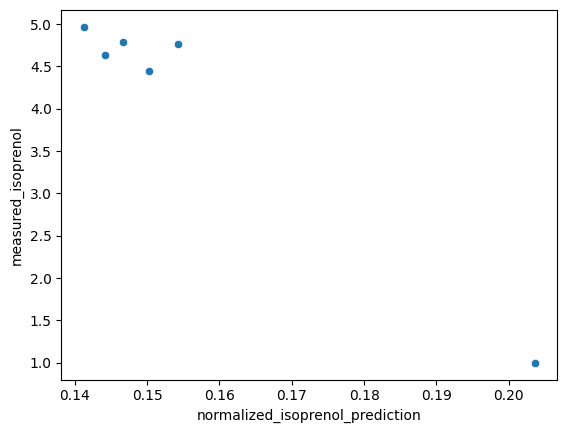

In [32]:
sns.scatterplot(data = pred_df,
                x = 'normalized_isoprenol_prediction',
                y = 'measured_isoprenol'
               )

In [33]:
pred_df

,strain,normalized_isoprenol_prediction,measured_isoprenol
0,Control_c0,0.203606,1.000000
1,Control_c1,0.203606,1.000000
2,Control_c2,0.203606,1.000000
3,Control_c3,0.203606,1.000000
4,Control_c4,0.203606,1.000000
5,Control_c5,0.203606,1.000000
6,Control_c6,0.203606,1.000000
7,PP_0751_PP_0813_PP_0815_c6,0.141266,4.968972
8,PP_0528_PP_0751_PP_0815_c6,0.146639,4.791595
9,PP_0528_PP_0751_PP_0812_PP_0815_c6,0.154288,4.762459


In [ ]:
pred_df.sort_values('normalized_isoprenol_prediction', ascending = False)

In [35]:
mi_list[-1]

,fluxes,reduced_costs
3HAD160,0.000378,-3.028101e-17
13DAMPPabcpp,0.000000,9.978508e-17
13DAMPPtex,0.000000,4.738893e-18
15DAPabcpp,0.000000,9.978508e-17
1P2CBXLCYCL,0.000000,-5.411100e-17
...,...,...
PMD,0.087643,-2.050402e-16
IPMPP,0.087643,5.921504e-17
IPOHtrpp,-0.087643,-0.000000e+00
IPOHtex,-0.087643,-0.000000e+00


In [41]:
model.reactions[100].subsystem

'S_PHAs_Metabolism'

In [58]:
model_subsystems = list(set([r.subsystem for r in model.reactions]))
print(len(model_subsystems))

92


In [69]:
mi_soln = mi_list[-1].to_frame()
mi_control = mi_list[0].to_frame()
fba_soln = fba_list[-1].to_frame()
fba_control = fba_list[0].to_frame()
pathway_flux_change_list = []
pathway_flux_cond = []
pathway_flux_ctrl = []
for subsystem in model_subsystems:
    ss_rxns = [r.id for r in model.reactions if r.subsystem == subsystem]
    pathway_flux_cond.append(np.min(np.abs(fba_soln.loc[ss_rxns, 'fluxes'])))
    pathway_flux_ctrl.append(np.min(np.abs(fba_control.loc[ss_rxns, 'fluxes'])))
    
min_flux_df = pd.DataFrame.from_dict(
    {
        'pathway': model_subsystems,
        'cond': pathway_flux_cond,
        'ctrl': pathway_flux_ctrl
    }
)

In [71]:
min_flux_df

,pathway,cond,ctrl
0,S_Cell_Envelope_Biosynthesis,0.000000,0.000000
1,S_Plant_growth_promoting,0.000000,0.000000
2,S_Phosphonate_and_phosphinate_metabolism,0.000000,0.000000
3,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,0.000000,0.000000
4,S_Aromatic_Compounds_Degradation__Phenylacetyl...,0.000000,0.000000
...,...,...,...
87,S_Alternate_Carbon__Levulinate_Metabolism,0.000000,0.000000
88,S_Glycine__Serine_and_threonine_metabolism,0.000000,0.000000
89,S_Cell_Envelope_Biosynthesis__Biosynthesis_of_...,0.000309,0.000705
90,S_tRNA_Charging,0.000000,0.000000


In [70]:
min_flux_df[min_flux_df['cond']>0

,pathway,cond,ctrl
20,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,0.000003,0.000007
33,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,0.000003,0.000007
56,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,0.000008,0.000017
64,S_Cofactor_and_Prosthetic_Group_Biosynthesis__...,0.000003,0.000007
89,S_Cell_Envelope_Biosynthesis__Biosynthesis_of_...,0.000309,0.000705


In [65]:
mi_list[0].status

'optimal'